Kaggle - Digit Recognizer
=============

Use deep CNN (convolutional neural network) to classity MNIST data.

Import modules

In [106]:
from __future__ import print_function
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from six.moves import cPickle as pickle
from six.moves import range

Pre-proceeding data

In [107]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
num_labels = 10

dataset = np.array(train_data.loc[:,'pixel0':'pixel783']).astype(np.float32)
labels = np.array(train_data['label']).astype(np.float32)

train_dataset, valid_dataset, train_labels, valid_labels = train_test_split(dataset, labels, test_size=0.1, random_state=42)
train_labels = (np.arange(num_labels) == train_labels[:,None]).astype(np.float32)
valid_labels = (np.arange(num_labels) == valid_labels[:,None]).astype(np.float32)
test_dataset = np.array(test_data.loc[:,'pixel0':'pixel783']).astype(np.float32)
print("Shape of training dataset: ", train_dataset.shape, train_labels.shape)
print("Shape of valid dataset: ", valid_dataset.shape, valid_labels.shape)
print("Shape of test dataset: ", test_dataset.shape)
#print(train_labels[:5])

Shape of training dataset:  (37800, 784) (37800, 10)
Shape of valid dataset:  (4200, 784) (4200, 10)
Shape of test dataset:  (28000, 784)


Visualize images

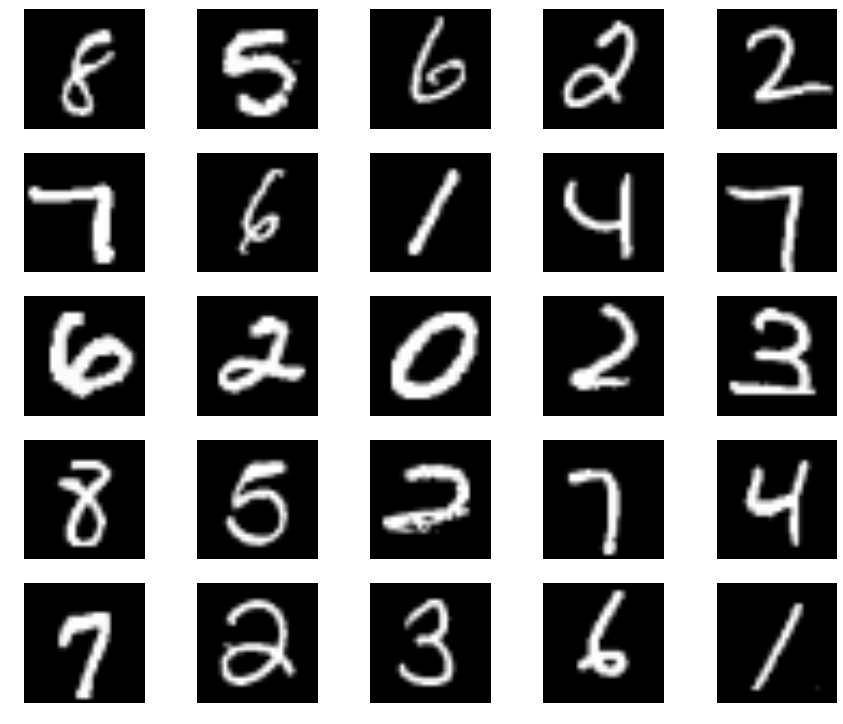

In [110]:
train_img_data = np.reshape(train_dataset, (-1, image_size, image_size))

plt.figure(figsize=(15,15))
columns = 5
images = train_img_data[:25]
images.shape
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap='gray')

Fully connected network

In [151]:
batch_size = 100
image_size = 28

graph = tf.Graph()
with graph.as_default():
  tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size * image_size))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
#  tf_test_dataset = tf.constant(test_dataset)
        
  num_neurons = 1024
  layer1_weights = tf.Variable(tf.truncated_normal([image_size * image_size, num_neurons]))
  layer1_biases = tf.Variable(tf.zeros([num_neurons]))
  layer1_hidden = tf.nn.relu(tf.matmul(tf_train_dataset, layer1_weights) + layer1_biases)
  
  out_weights = tf.Variable(tf.truncated_normal([num_neurons, num_labels])) 
  out_biases = tf.Variable(tf.zeros([num_labels]))
  logits = tf.matmul(layer1_hidden, out_weights) + out_biases

  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=tf_train_labels))
  optimizer = tf.train.GradientDescentOptimizer(0.0001).minimize(loss)
  
  train_prediction = tf.nn.softmax(logits)

  valid_relu = tf.nn.relu(tf.matmul(tf_valid_dataset, layer1_weights) + layer1_biases)
  valid_prediction = tf.nn.softmax(tf.matmul(valid_relu, out_weights) + out_biases)

In [152]:
num_steps = 5001

def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      print('Minibatch loss at step %d: %f' % (step, l))
      print('Minibatch training accuracy: %.1f%%' % accuracy(predictions, batch_labels))
      print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(), valid_labels))

Initialized
Minibatch loss at step 0: 71768.093750
Minibatch training accuracy: 6.0%
Validation accuracy: 9.6%
Minibatch loss at step 500: 1589.057983
Minibatch training accuracy: 89.0%
Validation accuracy: 86.5%
Minibatch loss at step 1000: 307.895416
Minibatch training accuracy: 93.0%
Validation accuracy: 89.1%
Minibatch loss at step 1500: 400.548553
Minibatch training accuracy: 91.0%
Validation accuracy: 91.0%
Minibatch loss at step 2000: 1175.096680
Minibatch training accuracy: 93.0%
Validation accuracy: 91.6%
Minibatch loss at step 2500: 445.607574
Minibatch training accuracy: 98.0%
Validation accuracy: 91.9%
Minibatch loss at step 3000: 48.833740
Minibatch training accuracy: 97.0%
Validation accuracy: 92.4%
Minibatch loss at step 3500: 60.578262
Minibatch training accuracy: 97.0%
Validation accuracy: 92.3%
Minibatch loss at step 4000: 168.921158
Minibatch training accuracy: 95.0%
Validation accuracy: 92.6%
Minibatch loss at step 4500: 139.306030
Minibatch training accuracy: 97.0%

Reformat into a TensorFlow-friendly shape:
- convolutions need the image data formatted as a cube (width by height by #channels)
- labels as float 1-hot encodings.

In [153]:
num_channels = 1 # grayscale

def reformat(dataset, labels):
  dataset = dataset.reshape(
    (-1, image_size, image_size, num_channels)).astype(np.float32)
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels

train_dataset, valid_dataset, train_labels, valid_labels = train_test_split(dataset, labels, test_size=0.1, random_state=42)
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
#test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
#print('Test set', test_dataset.shape, test_labels.shape)

Training set (37800, 28, 28, 1) (37800, 10)
Validation set (4200, 28, 28, 1) (4200, 10)


Convolutional networks with two convolutional layers and one fully connected layer.

In [165]:
batch_size = 16
patch_size = 5
depth = 16
num_hidden = 512
num_channels = 1

graph = tf.Graph()

with graph.as_default():

  # Input data.
  tf_train_dataset = tf.placeholder(
    tf.float32, shape=(batch_size, image_size, image_size, num_channels))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
#  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  layer1_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, num_channels, depth], stddev=0.1))
  layer1_biases = tf.Variable(tf.zeros([depth]))
  layer2_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, depth, depth], stddev=0.1))
  layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
  layer3_weights = tf.Variable(tf.truncated_normal(
      [image_size // 4 * image_size // 4 * depth, num_hidden], stddev=0.1))
  layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
  layer4_weights = tf.Variable(tf.truncated_normal(
      [num_hidden, num_labels], stddev=0.1))
  layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
  # Model.
  def model(data):
    conv = tf.nn.conv2d(data, layer1_weights, [1, 2, 2, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer1_biases)
    conv = tf.nn.conv2d(hidden, layer2_weights, [1, 2, 2, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer2_biases)
    shape = hidden.get_shape().as_list()
    reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])
    hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    return tf.matmul(hidden, layer4_weights) + layer4_biases
  
  # Training computation.
  logits = model(tf_train_dataset)
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.0005).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
#  test_prediction = tf.nn.softmax(model(tf_test_dataset))

In [167]:
num_steps = 1001

with tf.Session(graph=graph) as session:
#  tf.global_variables_initializer().run()
  tf.initialize_all_variables().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 5000 == 0):
      print('Minibatch loss at step %d: %f' % (step, l))
      print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_prediction.eval(), valid_labels))
#  print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))

Initialized
Minibatch loss at step 0: 141.636429
Minibatch accuracy: 31.2%
Validation accuracy: 18.3%
Minibatch loss at step 5000: 0.208911
Minibatch accuracy: 87.5%
Validation accuracy: 90.5%
Minibatch loss at step 10000: 0.109204
Minibatch accuracy: 100.0%
Validation accuracy: 92.4%
Minibatch loss at step 15000: 0.122986
Minibatch accuracy: 100.0%
Validation accuracy: 93.6%
Minibatch loss at step 20000: 0.204666
Minibatch accuracy: 93.8%
Validation accuracy: 94.1%
Minibatch loss at step 25000: 0.008959
Minibatch accuracy: 100.0%
Validation accuracy: 95.0%
Minibatch loss at step 30000: 0.309121
Minibatch accuracy: 87.5%
Validation accuracy: 94.9%
Minibatch loss at step 35000: 0.071846
Minibatch accuracy: 100.0%
Validation accuracy: 95.5%
Minibatch loss at step 40000: 0.007854
Minibatch accuracy: 100.0%
Validation accuracy: 95.4%
Minibatch loss at step 45000: 0.389916
Minibatch accuracy: 81.2%
Validation accuracy: 95.4%
Minibatch loss at step 50000: 0.015261
Minibatch accuracy: 100.0%
